# Trabalho 1 - MO651
### Professora Esther Columbini
#### Tito Barbosa Rezende
#### João Paulo
#### Élcio

### Pré-requisitos

In [1]:
%pip install matplotlib
%pip install numpy
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Modelo Kinemático

In [1]:
import sys
sys.path.insert(0, '../src')
from robot import Robot
import utils
import matplotlib.pyplot as plt
import numpy as np
import vrep
import math

Definindo nosso objeto Robô

In [2]:
robot = Robot()

Connected to remoteApi server.
 Pioneer_p3dx_ultrasonicSensor1 connected.
 Pioneer_p3dx_ultrasonicSensor2 connected.
 Pioneer_p3dx_ultrasonicSensor3 connected.
 Pioneer_p3dx_ultrasonicSensor4 connected.
 Pioneer_p3dx_ultrasonicSensor5 connected.
 Pioneer_p3dx_ultrasonicSensor6 connected.
 Pioneer_p3dx_ultrasonicSensor7 connected.
 Pioneer_p3dx_ultrasonicSensor8 connected.
 Pioneer_p3dx_ultrasonicSensor9 connected.
 Pioneer_p3dx_ultrasonicSensor10 connected.
 Pioneer_p3dx_ultrasonicSensor11 connected.
 Pioneer_p3dx_ultrasonicSensor12 connected.
 Pioneer_p3dx_ultrasonicSensor13 connected.
 Pioneer_p3dx_ultrasonicSensor14 connected.
 Pioneer_p3dx_ultrasonicSensor15 connected.
 Pioneer_p3dx_ultrasonicSensor16 connected.
 Vision sensor connected.
 Laser connected.
 Left motor connected.
 Right motor connected.
 Robot connected.


Testando os sensores

In [4]:
print ('Sensores Ultrassônicos')
print (robot.read_ultrassonic_sensors())
print ('Laser')
print (robot.read_laser())
print ('Visão')
print (robot.read_vision_sensor())

Sensores Ultrassônicos
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.588206946849823, 0.4594383239746094, 0.4454325735569, 5.0, 5.0, 5.0, 5.0]
Laser
[-2.4147510528564453, -4.182470321655273, 0.06300000101327896, -2.3826279640197754, -4.185997009277344, 0.06300000101327896, -2.3510262966156006, -4.190131187438965, 0.06299999356269836, -2.3107059001922607, -4.17819881439209, 0.06299999356269836, -2.2802021503448486, -4.18350887298584, 0.06299999356269836, -2.250190019607544, -4.189476013183594, 0.06299999356269836, -2.2116074562072754, -4.179013252258301, 0.06299999356269836, -2.1825592517852783, -4.186113357543945, 0.06299999356269836, -2.145064115524292, -4.176573753356934, 0.06299999356269836, -2.11689829826355, -4.184781074523926, 0.06299998611211777, -2.080406904220581, -4.176125526428223, 0.06299998611211777, -2.0530481338500977, -4.185419082641602, 0.06299998611211777, -2.0174829959869385, -4.177615642547607, 0.06299998611211777, -1.9908602237701416, -4.187978744506836, 0.062999

Testando Visão do Robo

In [11]:
vision_snapshot = robot.read_vision_sensor()
resolution = vision_snapshot[0]
img = vision_snapshot[1]

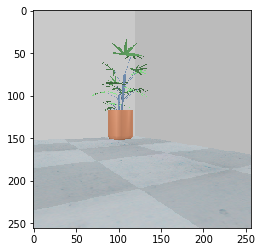

In [12]:
rbgimage = utils.vrep2array(img, resolution)
plt.imshow(rbgimage)
plt.show()

Testando a posição global do Robô

In [7]:
print('Posição')
print(robot.get_current_position())
print('Orientação')
print(robot.get_current_orientation())

Posição
[-2.025656223297119, -0.8249909281730652, 0.13867789506912231]
Orientação
[-7.64411233831197e-05, -0.002010151045396924, -2.2225141947274096e-05]


Testando atuadores (movimentação)

Velocidade em m/s

Velocidade angular em rad/s

(retire os comentários para testar e movimentar o robo)

In [16]:
robot.set_left_velocity(0.5)

In [19]:
robot.stop()

In [18]:
robot.set_right_velocity(0.5)
robot.set_left_velocity(0.5)

In [ ]:
robot.set_right_velocity(0.5)

In [81]:
#robot.stop()

In [5]:
robot.set_velocity(1,1) #V, W

In [6]:
robot.stop()

NameError: name 'self' is not defined

## Kinematic Model

In [39]:
class Us_sensor:
    def __init__(self,robot):
        orientation_angles = np.array([90,50,30,10,-10,-30,-50,-90,-90,-130,-150,-170,170,150,130,90])
        orientation_rad = np.radians(orientation_angles)
        self.data = {
        "prefix" : "Pioneer_p3dx_ultrasonicSensor",
        "ids" : np.arange(1,17,1), "handles" : np.zeros(16, dtype=int), 
        "positions" :  np.zeros((16,3),dtype=float),
        "angles_deg": orientation_angles,
        "angles_rad": orientation_rad
        }
        self.robot = robot
        
        for i,sensor_i in enumerate(self.data['ids']):
            ret,handle = vrep.simxGetObjectHandle(self.robot.clientID, self.data['prefix'] + str(sensor_i), vrep.simx_opmode_oneshot_wait)
            self.data['handles'][i] = handle
            ret, pos = vrep.simxGetObjectPosition(self.robot.clientID, handle, self.robot.robot_handle, vrep.simx_opmode_oneshot_wait)
            #ret, ang = vrep.simxGetObjectOrientation(robot.clientID, handle, robot.robot_handle, vrep.simx_opmode_oneshot_wait)
            self.data['positions'][i] = pos
            #ultrassonic_sensors[sensor_i,4:7] = ang
            
    def proximity_robot_frame(self, sensorId):
        index = sensorId -1
        angulars = self.data["angles_rad"][index]

        #leitura bruta do sensor
        sensor_handle = self.data["handles"][index]
        res, status, distance,_,_ = vrep.simxReadProximitySensor(self.robot.clientID, sensor_handle, vrep.simx_opmode_oneshot_wait)
        #Matriz de rotação
        rot_matrix = np.array([[math.cos(angulars),-math.sin(angulars)],[math.sin(angulars),math.cos(angulars)]])
        #Rotacionando a leitura
        distXY = np.dot(rot_matrix , np.array([[distance],[0]]))
        #Matriz de translação
        posicao_sensor_x = self.data["positions"][index][0]
        posicao_sensor_y = self.data["positions"][index][1]
        transXY=np.array([[distXY[0][0]+posicao_sensor_x],[distXY[1][0]+posicao_sensor_y]])
        return transXY

us_sensors = Us_sensor(robot)

In [46]:
sensor_handle = us_sensors.data["handles"][0]
res, status, point,handle,vector = vrep.simxReadProximitySensor(us_sensors.robot.clientID, sensor_handle, vrep.simx_opmode_oneshot_wait)

In [49]:
point

[3.587324068671532e-43, 3.587324068671532e-43, 8.407790785948902e-45]

In [37]:
us_sensors.data

{'prefix': 'Pioneer_p3dx_ultrasonicSensor',
 'ids': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 'handles': array([328, 327, 326, 325, 324, 323, 322, 321, 336, 335, 334, 333, 332,
        331, 330, 329]),
 'positions': array([[ 0.10637677,  0.13819861,  0.06811073],
        [ 0.15540195,  0.12504983,  0.0681117 ],
        [ 0.19057763,  0.08313394,  0.06810802],
        [ 0.20916188,  0.02727365,  0.06810355],
        [ 0.20916176, -0.02727318,  0.06810793],
        [ 0.19054294, -0.07850146,  0.06811471],
        [ 0.15551949, -0.12023926,  0.06811865],
        [ 0.10637712, -0.13814425,  0.06811057],
        [-0.11032343, -0.13815117,  0.06817228],
        [-0.15956628, -0.12024236,  0.06817006],
        [-0.19458079, -0.07850122,  0.06816825],
        [-0.21320748, -0.02727556,  0.0681669 ],
        [-0.21320784,  0.02727294,  0.06816684],
        [-0.19458878,  0.0784986 ,  0.06816804],
        [-0.15956688,  0.12026429,  0.06817006],
        [-0.110323

Primeiramente vamos localizar a posição dos sensores em relação ao frame do robo

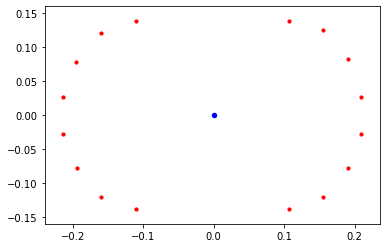

In [24]:
fig, ax = plt.subplots()
#posição dos sensores US
ax.scatter(us_sensors.data['positions'][:,0], us_sensors.data['positions'][:,1], 10, c='r', marker='o')
#posição do centro do robo
ax.scatter(0, 0, 20, c='b', marker='o')

plt.show()

Vamos testar a transformação da leitura dos sensores ultrassônicos em relação ao frame do robo

In [40]:
us_sensors.proximity_robot_frame(1)

TypeError: can't multiply sequence by non-int of type 'float'

In [27]:
def us_proximity_robot_frame(sensorId, input_distance):
    sensorId_zerobased = sensorId -1
    angular = [90,50,30,10,-10,-30,-50,-90,-90,-130,-150,-170,170,150,130,90]
    angulars = math.radians(angular[sensorId_zerobased])
    rot_matrix = np.array([[math.cos(angulars),-math.sin(angulars)],[math.sin(angulars),math.cos(angulars)]])
    distXY = np.dot(rot_matrix , np.array([[input_distance],[0]]))
    
    transXY=np.array([[distXY[0][0]+ultrassonic_sensors[sensorId_zerobased][1]],[distXY[1][0]+ultrassonic_sensors[sensorId_zerobased][2]]])
    return transXY
#rotXY=np.dot(np.array([[math.cos(angulars),-math.sin(angulars)],[math.sin(angulars),math.cos(angulars)]]),np.array([[distances[i]],[0]]))

In [28]:
#Testing function
newProximityPoint = us_robot_frame(1,2)
newProximityPoint

NameError: name 'ultrassonic_sensors' is not defined

## Odometria

In [ ]:
import sys
sys.path.insert(0, '../lib')
import vrep
import math
import time
import matplotlib.pyplot as plt
import numpy as np

vrep.simxFinish(-1)
clientID = vrep.simxStart('127.0.0.1', 19997, True, True, 5000, 5)
if clientID != -1:
    print("Connected to remoteApi server.")
    ret1, motorLeft = vrep.simxGetObjectHandle(clientID, "Pioneer_p3dx_leftMotor", vrep.simx_opmode_oneshot_wait)
    ret2, motorRight = vrep.simxGetObjectHandle(clientID, "Pioneer_p3dx_rightMotor", vrep.simx_opmode_oneshot_wait)

    ret3, robot_handle = vrep.simxGetObjectHandle(clientID, "Pioneer_p3dx", vrep.simx_opmode_oneshot_wait)

    ret4, previousJointPosition = vrep.simxGetJointPosition(clientID, motorLeft, vrep.simx_opmode_streaming)
    ret5, previousJointPositionR = vrep.simxGetJointPosition(clientID, motorRight, vrep.simx_opmode_streaming)
    totalJointPosition = 0
    odometry = [0, 0]
    ang = 0
    ret8, previousPosition = vrep.simxGetObjectPosition(clientID, robot_handle, -1, vrep.simx_opmode_oneshot_wait)
    # function to show the plot 
    plt.ion()
    fig, ax = plt.subplots()
    x, y = [], []
    # naming the x axis 
    plt.xlabel('x - axis')
    # naming the y axis 
    plt.ylabel('y - axis')
    x = [previousPosition[0], previousPosition[0]]
    y = [previousPosition[1], previousPosition[1]]
    # giving a title to my graph 
    plt.title('Odometry vs Ground Truth')

    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.draw()
    color = ['blue', 'red']
    l1 = ['Truth', 'Odometry']
    sc = ax.scatter(x[0], y[0], s=5, edgecolors='none', c=color[0], label=l1[0])
    sc = ax.scatter(x[1], y[1], s=5, edgecolors='none', c=color[1], label=l1[1])
    fig.canvas.draw()
    ax.legend()
    plt.show()

    ##    v0=2
    ##    vLeft=v0
    ##    vRight=v0

    # diametro da roda = 195mm; comprimento do eixo = 381mm
    radius = 0.195 / 2
    L = 0.381 / 2
    # vrep.simxSetJointTargetVelocity(clientID,motorLeft,0,vrep.simx_opmode_streaming)
    # vrep.simxSetJointTargetVelocity(clientID,motorRight,0,vrep.simx_opmode_streaming)
    while (v0 > 0):
        jl, actualJointPosition = vrep.simxGetJointPosition(clientID, motorLeft, vrep.simx_opmode_buffer)
        jr, actualJointPositionR = vrep.simxGetJointPosition(clientID, motorRight, vrep.simx_opmode_buffer)
        dxL = actualJointPosition - previousJointPosition
        dxR = actualJointPositionR - previousJointPositionR

        if (dxL >= 0):
            dxL = math.fmod(dxL + math.pi, 2 * math.pi) - math.pi
        else:
            dxL = math.fmod(dxL - math.pi, 2 * math.pi) + math.pi

        if (dxR >= 0):
            dxR = math.fmod(dxR + math.pi, 2 * math.pi) - math.pi
        else:
            dxR = math.fmod(dxR - math.pi, 2 * math.pi) + math.pi

        ret4, previousJointPosition = vrep.simxGetJointPosition(clientID, motorLeft, vrep.simx_opmode_oneshot)
        ret5, previousJointPositionR = vrep.simxGetJointPosition(clientID, motorRight, vrep.simx_opmode_oneshot)
        # vrep.simxSetFloatSignal(clientID,"leftEncoder",totalJointPosition,vrep.simx_opmode_oneshot_wait)
        ret9, position = vrep.simxGetObjectPosition(clientID, robot_handle, -1, vrep.simx_opmode_oneshot_wait)
        newposition = math.sqrt(
            math.pow(previousPosition[0] - position[0], 2) + math.pow(previousPosition[1] - position[1], 2))

        j = [round(dxL, 3), round(dxR, 3)]
        # print(j)
        if (round(dxR, 3) != round(dxL, 3)):
            ang = ang - (radius * dxL / (2 * L)) + (radius * dxR / (2 * L))
        else:
            ang = ang
        dist0 = (radius * dxL / 2) + (radius * dxR / 2)

        rotXY = np.dot(np.array([[math.cos(ang), -math.sin(ang)], [math.sin(ang), math.cos(ang)]]),
                       np.array([[dist0], [0]]))
        print(dist0)
        transXY = np.array([[rotXY[0][0] + previousPosition[0]], [rotXY[1][0] + previousPosition[1]]])
        previousPosition = [transXY[0][0], transXY[1][0]]
        x = [position[0], transXY[0][0]]
        y = [position[1], transXY[1][0]]
        color = ['blue', 'red']
        l1 = ['Truth', 'Odometry']
        sc = ax.scatter(x, y, s=5, edgecolors='none', c=color, label=l1)
        fig.canvas.draw()
        time.sleep(0.1)
else:
    vrep.simxFinish(clientID)
    sys.exit("\033[91m ERROR: Unable to connect to remoteApi server. Consider running scene before executing script.")
